<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Cryptocurrency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crypto Currency Analysis With Python**

---



In [1]:
# Import the libraries
import numpy as np
import pandas as pd

In [2]:
# Load the data 
from google.colab import files
uploaded = files.upload()

Saving ETH-USD.csv to ETH-USD.csv
Saving LTC-USD.csv to LTC-USD.csv
Saving BTC-USD.csv to BTC-USD.csv


In [3]:
# Store the data into dataframes
df_btc = pd.read_csv('BTC-USD.csv')
df_ltc = pd.read_csv('LTC-USD.csv')
df_eth = pd.read_csv('ETH-USD.csv')

In [6]:
# View the data
# The first five rows of data for Bitcoin
df_btc.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,9548.178711,9681.648438,9472.948242,9519.145508,9519.145508,13791445323
1,2019-07-30,9522.329102,9701.759766,9437.335938,9607.423828,9607.423828,13829811132
2,2019-07-31,9604.050781,10085.627930,9598.097656,10085.627930,10085.627930,16631520647
3,2019-08-01,10077.442383,10446.919922,9922.019531,10399.668945,10399.668945,17165337857
4,2019-08-02,10402.042969,10657.953125,10371.013672,10518.174805,10518.174805,17489094081


In [7]:
# The first five rows for Litecoin
df_ltc.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,89.771797,91.394356,88.566010,90.426422,90.426422,2457824867
1,2019-07-30,90.471451,92.192444,89.020401,90.566948,90.566948,2302521844
2,2019-07-31,90.470993,99.483810,90.334885,98.509575,98.509575,3051471469
3,2019-08-01,98.566689,100.257484,95.980942,99.179726,99.179726,2953184688
4,2019-08-02,99.199585,99.199585,93.544075,94.941292,94.941292,2882784454


In [8]:
# The first five rows of data for Ethereum
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,211.123657,213.932053,208.764313,211.268051,211.268051,5485190664
1,2019-07-30,211.339203,213.614075,206.867615,210.522598,210.522598,5489918858
2,2019-07-31,210.492416,218.654144,210.437912,218.654144,218.654144,6003828339
3,2019-08-01,218.554596,218.812653,212.914505,217.808441,217.808441,5965442642
4,2019-08-02,217.884460,222.182571,215.975830,217.871567,217.871567,6159440229


In [9]:
# Create a new dataframe to store the closing prices for the three currencies 
df = pd.DataFrame({'BTC': df_btc['Close'],
                   'LTC': df_ltc['Close'],
                   'ETH': df_eth['Close']
                    })

In [11]:
# View the data frame 
df.head()

,BTC,LTC,ETH
0,9519.145508,90.426422,211.268051
1,9607.423828,90.566948,210.522598
2,10085.627930,98.509575,218.654144
3,10399.668945,99.179726,217.808441
4,10518.174805,94.941292,217.871567


In [12]:
# Get the rows and columns 
df.shape

(367, 3)

In [13]:
# Get statistics on the data
df.describe()

,BTC,LTC,ETH
count,367.000000,367.000000,367.000000
mean,8738.748864,54.413238,191.509385
std,1314.018997,14.074561,40.617437
min,4970.788086,30.930883,110.605873
25%,7661.308594,43.588140,165.528649
50%,8942.808594,48.727329,186.607742
75%,9632.025391,61.708141,222.697892
max,11966.407227,99.179726,323.664398


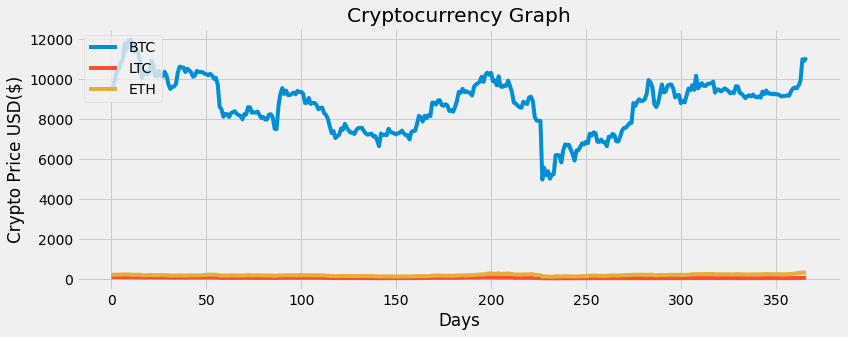

In [14]:
# Visulize the closing prices
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize=(12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label= c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price USD($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [15]:
# Scale the data to get a different visual
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)
scaled


array([[ 65.01722478,  87.17442873,  47.24625687],
       [ 66.27913339,  87.38033112,  46.89637507],
       [ 73.11489864,  99.01807713,  50.71295364],
       ...,
       [ 86.05507018,  32.26302899,  98.99074726],
       [ 84.93937472,  36.10951178,  96.7111661 ],
       [ 87.38783786,  36.58206631, 100.        ]])

In [16]:
# Convert the scaled data into a data frame
df_scaled = pd.DataFrame(scaled, columns= df.columns)

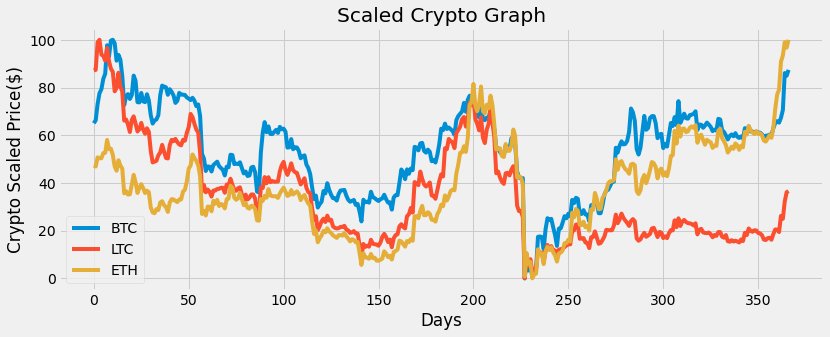

In [21]:
# Visualize the scaled data 
my_crypto = df_scaled

plt.figure(figsize=(12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot (my_crypto[c], label = c)

plt.title('Scaled Crypto Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price($)')
plt.legend(my_crypto.columns.values, loc= 'lower left')
plt.show()

In [22]:
# Get the daily simple return
DSR = df.pct_change(1)
DSR

,BTC,LTC,ETH
0,NaN,NaN,NaN
1,0.009274,0.001554,-0.003528
2,0.049774,0.087699,0.038626
3,0.031137,0.006803,-0.003868
4,0.011395,-0.042735,0.000290
...,...,...,...
362,0.014703,0.104617,0.088968
363,0.023566,-0.016926,0.018374
364,0.109610,0.103615,0.038336
365,-0.007101,0.049578,-0.015106


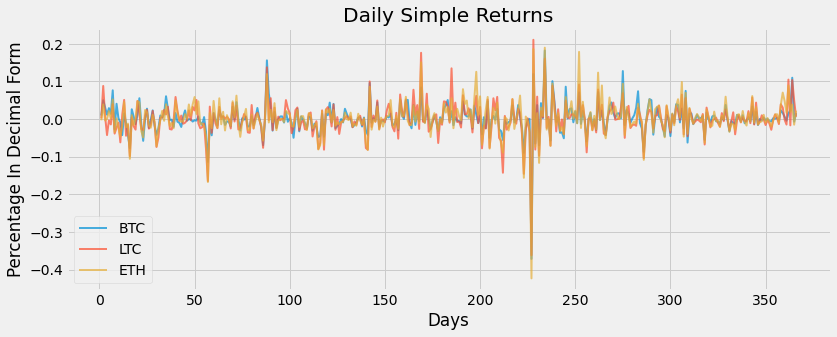

In [23]:
# Visualize the daily simple returns
plt.figure(figsize=(12.2, 4.5))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], label = c, lw= 2, alpha= 0.7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage In Decimal Form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'lower left')
plt.show()

In [24]:
# Get the volatility
print('The Cryptocurrency Volatility:')
DSR.std()

The Cryptocurrency Volatility:


BTC    0.038137
LTC    0.045482
ETH    0.046642
dtype: float64

### The volatility for ETH is higher than BTC and LTC as shown by the graph and standard deviation.

In [25]:
# Show the average daily simple return 
DSR.mean()

BTC    0.001195
LTC   -0.000230
ETH    0.002343
dtype: float64

### As a potential investor, I would invest in Bitcoin because it has a fair return and relatively low volatility.

In [26]:
# Get the correlation 
DSR.corr()

,BTC,LTC,ETH
BTC,1.000000,0.856165,0.878957
LTC,0.856165,1.000000,0.909319
ETH,0.878957,0.909319,1.000000


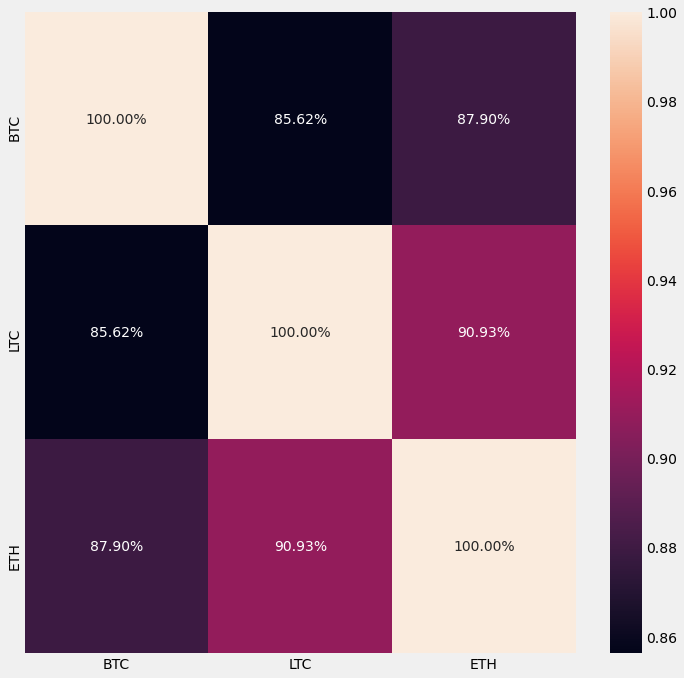

In [28]:
# Visualize the correlation 
import seaborn as sns
import pandas.util.testing as tm

plt.subplots(figsize=(11, 11))
sns.heatmap(DSR.corr(), annot= True, fmt = '.2%')

In [29]:
# Get the daily cummulative simple returns 
DCSR = (DSR + 1).cumprod()
DCSR

,BTC,LTC,ETH
0,NaN,NaN,NaN
1,1.009274,1.001554,0.996472
2,1.059510,1.089389,1.034961
3,1.092500,1.096800,1.030958
4,1.104949,1.049929,1.031257
...,...,...,...
362,1.016595,0.539718,1.439199
363,1.040552,0.530583,1.465643
364,1.154607,0.585559,1.521830
365,1.146408,0.614590,1.498841


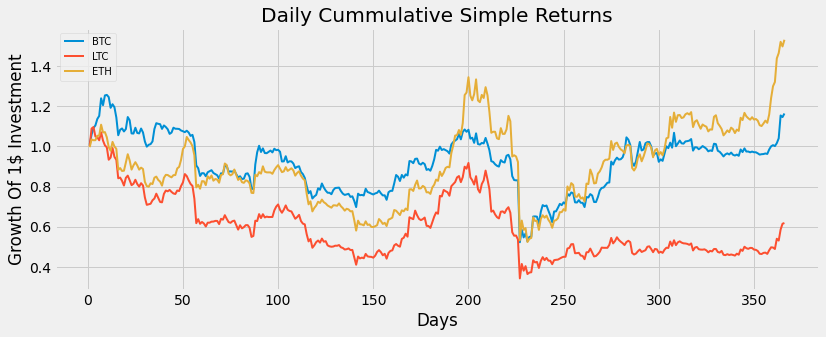

In [31]:
# Visualize the daily cummulative simple returns
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)

plt.title('Daily Cummulative Simple Returns')
plt.xlabel('Days')
plt.ylabel('Growth Of 1$ Investment')
plt.legend(DCSR.columns.values, loc='upper left', fontsize=10)
plt.show()

Our analysis shows that of the three Cryptocurrencies, Litecoin would be a poor investment, returning a loss over a year and Bitcoin or Ethereum would return a profit.